In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [24]:
import os
print(os.getcwd())

C:\Users\aryan\PROJECTS\DOG_VS_CAT


In [25]:
os.listdir()

['.ipynb_checkpoints', '1.ipynb', 'CAT', 'DOG']

In [26]:
dataset_path = r"C:\Users\aryan\PROJECTS\DOG_VS_CAT"

In [29]:
import os
from PIL import Image

dataset_path = r"C:\Users\aryan\PROJECTS\DOG_VS_CAT"

print("Checking dataset...")

for folder in ['CAT', 'DOG']:
    folder_path = os.path.join(dataset_path, folder)
    
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        
        try:
            # Remove empty files
            if os.path.getsize(file_path) == 0:
                print("Removing empty file:", file_path)
                os.remove(file_path)
                continue
            
            # Check if valid image
            img = Image.open(file_path)
            img.verify()
            
        except:
            print("Removing corrupted file:", file_path)
            os.remove(file_path)

print("Dataset cleaned ✅")

Checking dataset...
Dataset cleaned ✅


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [31]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    classes=['CAT', 'DOG']
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    classes=['CAT', 'DOG']
)

Found 2554 images belonging to 2 classes.
Found 638 images belonging to 2 classes.


In [32]:
print(train_data.class_indices)

{'CAT': 0, 'DOG': 1}


In [33]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

# Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

# Block 3
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

# Flatten
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

# Output
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [36]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stop]
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 634ms/step - accuracy: 0.5425 - loss: 5.7436 - val_accuracy: 0.4953 - val_loss: 3.4235
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 60s 745ms/step - accuracy: 0.5774 - loss: 0.7018 - val_accuracy: 0.5157 - val_loss: 3.4844
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 77s 960ms/step - accuracy: 0.6156 - loss: 0.6637 - val_accuracy: 0.4984 - val_loss: 2.9922
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 885ms/step - accuracy: 0.6559 - loss: 0.6501 - val_accuracy: 0.4875 - val_loss: 1.9377
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 767ms/step - accuracy: 0.6770 - loss: 0.6214 - val_accuracy: 0.5517 - val_loss: 8.6529
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 61s 759ms/step - accuracy: 0.6246 - loss: 0.8675 - val_accuracy: 0.5564 - val_loss: 1.0174
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 57s 707ms/step - accuracy: 0.6733 - loss: 0.6168 - val_accuracy: 0.6567 - val_loss: 0.6612
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 671ms/step - accuracy: 0.6996 - loss: 0.5749 - val_accu

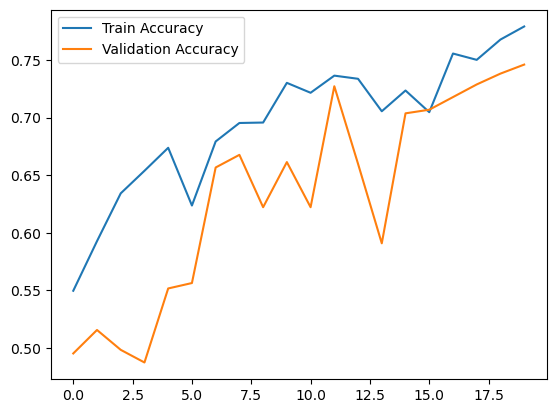

In [37]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\aryan\PROJECTS\DOG_VS_CAT/1611.jpg"

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Dog 🐶")
else:
    print("Cat 🐱")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Dog 🐶
